In [24]:
from glob import glob
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
uf = glob('../data/physicalData/wind/uwnd*')
vf = glob('../data/physicalData/wind/vwnd*')

In [17]:
dsU = xr.open_mfdataset(uf)
dsV = xr.open_mfdataset(vf)
dsWind = dsU.merge(dsV)
dsWind.sel(lat=70,lon=195)
dfWind =dsWind.sel(lat=70,lon=195).to_dataframe()

Text(0, 0.5, 'V Wind')

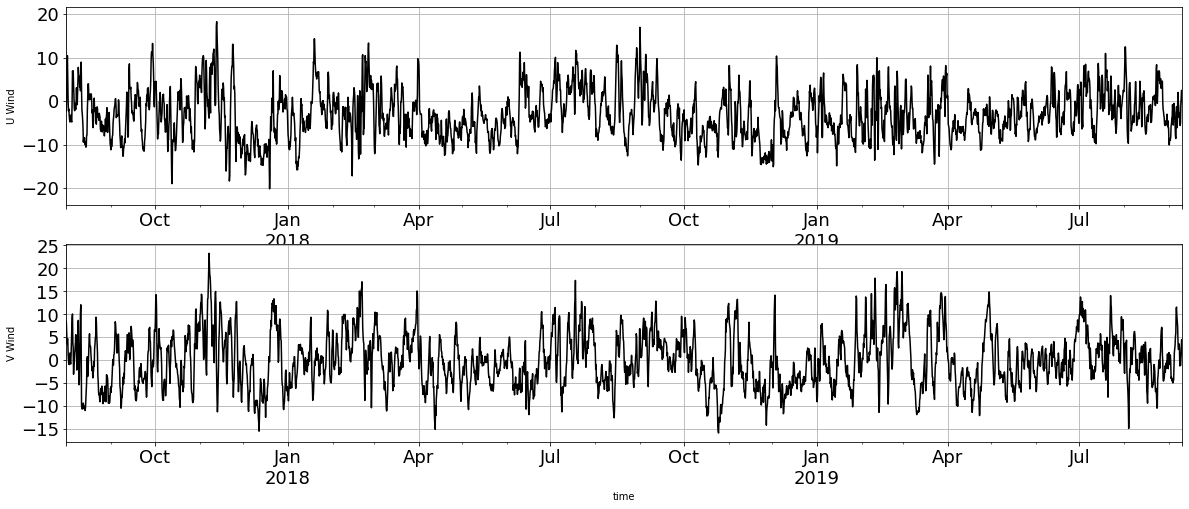

In [38]:
f, [ax1,ax2] = plt.subplots(2,1,figsize=(20,8),sharex=True, sharey=True)

ax1=plt.subplot(211)
dfWind.uwnd.plot(label='Wakeups',legend=False,fontsize='18',axes=ax1, color='k')
ax1.set_xlim([pd.to_datetime('2017-8-01'),pd.to_datetime('2019-9-10')])
ax1.grid()
ax1.set_ylabel('U Wind')

ax1=plt.subplot(212)
dfWind.vwnd.plot(label='Wakeups',legend=False,fontsize='18',axes=ax1, color='k')
ax1.set_xlim([pd.to_datetime('2017-8-01'),pd.to_datetime('2019-9-10')])
ax1.grid()
ax1.set_ylabel('V Wind')

Text(0, 0.5, 'V Wind')

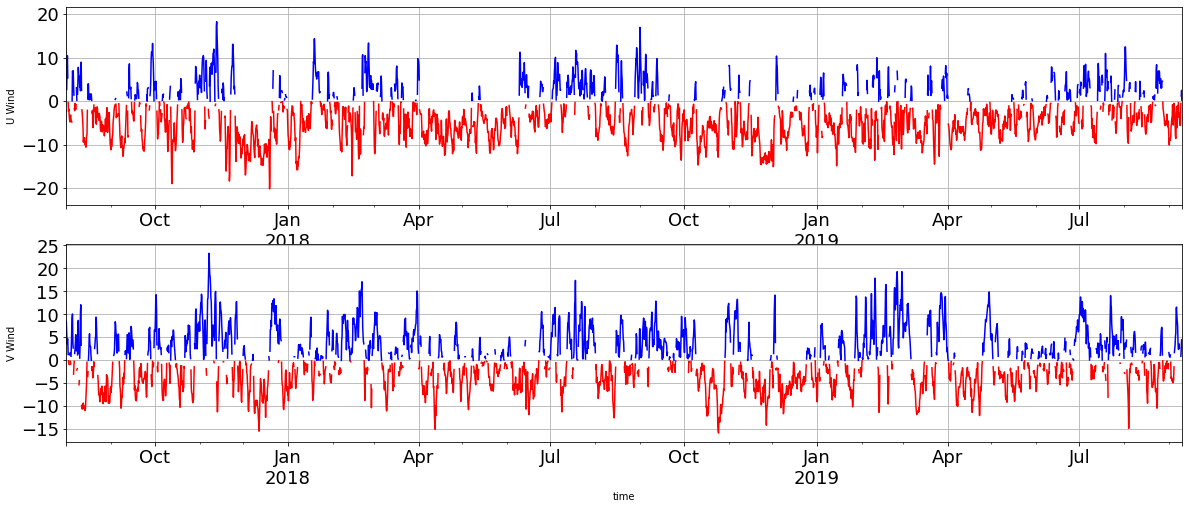

In [36]:
f, [ax1,ax2] = plt.subplots(2,1,figsize=(20,8),sharex=True, sharey=True)

ax1=plt.subplot(211)
a = dfWind.uwnd
a.where(a.ge(0), np.nan).plot(color='blue',axes=ax1,fontsize=18)
a.where(a.lt(0), np.nan).plot(color='red', axes=ax1,fontsize=18)
ax1.set_xlim([pd.to_datetime('2017-8-01'),pd.to_datetime('2019-9-10')])
ax1.grid()
ax1.set_ylabel('U Wind')

ax1=plt.subplot(212)
a = dfWind.vwnd
a.where(a.ge(0), np.nan).plot(color='blue',axes=ax1,fontsize=18)
a.where(a.lt(0), np.nan).plot(color='red', axes=ax1,fontsize=18)
ax1.set_xlim([pd.to_datetime('2017-8-01'),pd.to_datetime('2019-9-10')])
ax1.grid()
ax1.set_ylabel('V Wind')